# Webscraping Tradesy

Install rvest if needed and then load it:

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
knitr::opts_chunk$set(fig.width=7, fig.height=7)
if (!require("rvest")) install.packages("rvest")
library("rvest")

-   Now read one of the pages for on-sale at tradesy:

In [ ]:
url <- "https://www.tradesy.com/on-sale/?page=1&num_per_page=191"
webpage <- read_html(url)

-   Lets try to find the brand from the webpage using selector gadget:

In [ ]:
nodes <- html_nodes(webpage, ".item-tile__title-link .tdc-bold")
brand <- html_text(nodes)
brand<-trimws(brand)
str(brand)

 chr [1:191] "Louis Vuitton" "Louis Vuitton" "Chanel" "Louis Vuitton" ...

-   Let’s use the `table` function to print out a frequency table (or
    tally) of the brands.

In [ ]:
table(brand)

brand
         Balenciaga            Burberry             Cartier              Chanel 
                  2                   2                   1                  21 
Christian Louboutin                Dior               Fendi            Givenchy 
                  1                   3                   5                   1 
             Goyard               Gucci              Hermès       Louis Vuitton 
                  3                  31                   5                  96 
                MCM               Prada               Rolex       Saint Laurent 
                  1                   6                   2                   6 
      Tiffany & Co.          Tory Burch           Valentino          ZIMMERMANN 
                  2                   1                   1                   1 

-   Now let’s use `barplot` to get a barplot of the frequency table from
    above.

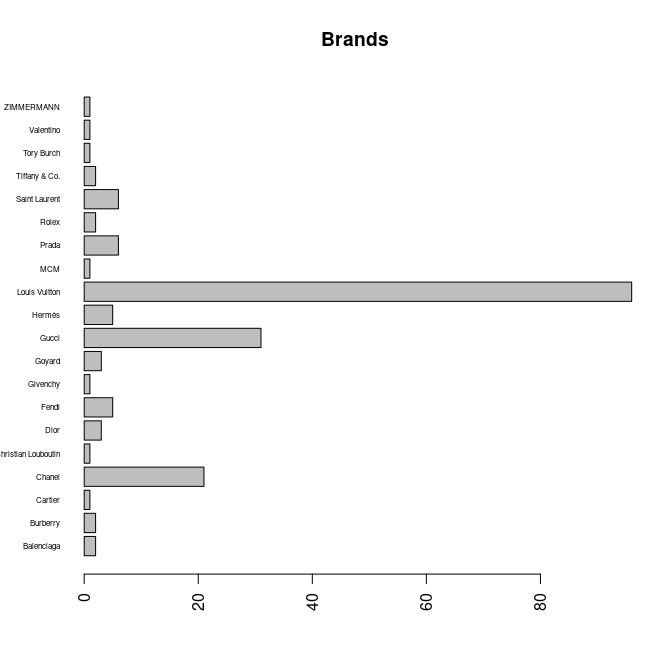

In [ ]:
barplot(table(brand), las=2, horiz=TRUE, main="Brands", cex.names=.5)

-   Now let’s use use selector gadget to the the item title

In [ ]:
nodes <- html_nodes(webpage, ".item-tile__title-link .tdc-ellipsis-text")
title <- html_text(nodes)
title<-trimws(title)
str(title)

 chr [1:191] "Small Kirigami Only Brown Mono..." ...

-   Now let’s use use selector gadget to the the price

In [ ]:
nodes <- html_nodes(webpage, ".item-tile__display-price--sale span:nth-child(1)")
prices<- html_text(nodes)
prices<-gsub(",","",prices)
prices<-sub("$", "", prices, fixed=TRUE)
#orig<-as.numeric(orig)
#price<-gsub("\\s", "", price)
#price<-sub("$", "", price, fixed=TRUE)
#price<-as.numeric(price)
prices<-as.numeric(prices)
str(prices)

 num [1:191] 479 670 963 689 504 ...

-   Now print out the prices and a histogram of prices

In [ ]:
prices

  [1]  479.10  670.50  963.00  689.00  504.29  715.00  230.00  425.00  325.72
 [10] 2799.60 1298.99 1325.00  699.00  879.00  638.00  498.00  999.00  998.70
 [19]  815.00  450.00  575.50  690.00  338.95 1112.49  410.00  631.00  703.00
 [28]  894.75  265.00  540.00  468.57 2515.00 1890.00 1075.72  898.00 1224.75
 [37]  408.00  815.00  265.00  775.75  517.17  555.00  937.50  799.00  999.00
 [46]  962.00  338.00  728.65  703.75  200.00  350.00  917.70  611.43  965.00
 [55]  695.25  984.75  423.00 1247.50  386.00 1075.72 1550.25  790.00  125.00
 [64]  565.00  515.00  700.00  973.50  384.00  984.75  897.15 1222.99  564.10
 [73]  197.00  342.19  756.60  984.75  381.00  504.29  697.00  893.00  660.00
 [82]  390.00 2102.00  540.00  165.00  490.00  603.60  790.00  888.00 1265.25
 [91]  248.63 1725.00 1033.00  230.00 1265.00  904.80  409.00  182.86  815.00
[100] 1015.00 1509.00  930.00  780.00  340.00  267.00 1395.00  545.25  894.75
[109] 1630.00  566.00  397.15 1235.25 4030.00  212.50   49.00  7

-   Now print out a histogram of prices

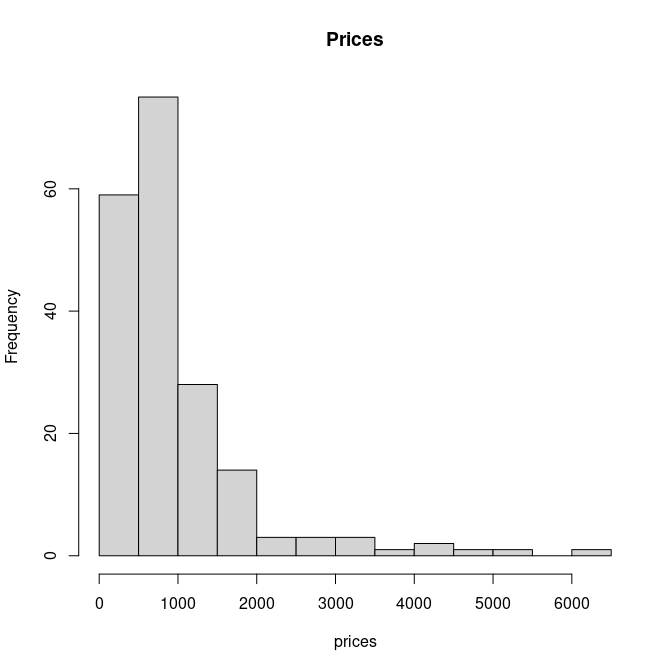

In [ ]:
hist(prices, xlab="prices", breaks=20, main="Prices")